# LSN Exercise 6

# The Ising 1D model

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Settings for plots

TITLE_SIZE = 20
LABEL_SIZE = 16
SCALE = 6
FIG_SIZE = (SCALE*0.5*(1+np.sqrt(5)), SCALE)

# declarations fo expected plots

points=100
T = np.linspace(0.2,3.0,num=points)
beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th

# function for reading

def read_observables(filename, n_blocks, obs, err):
    with open(filename) as f:
        appo2 = []
        appo = f.read().splitlines()
        for i in range(1,len(appo)+1):
            if i%n_blocks==0:
                appo2.append(appo[i-1].split())
                
    for i in range(len(appo2)):
        obs.append(float(appo2[i][2]))
        err.append(float(appo2[i][3]))
        
# -----------------------------------------------

# function for showing results

def print_results(temp, obs, err):
    for i in range(len(temp)):
        print(str(temp[i]) + ": \t " + str(obs[i]) + " +/- " + str(err[i]))
        
# -----------------------------------------------

# temperature range

temp = [round(0.10*i,2) for i in range(5, 26)]

## Energy

Energy (per particle) and errors as a function of temperature - M(RT)^2 sampling

0.5: 	 -0.974299 +/- 0.000371791
0.6: 	 -0.935011 +/- 0.000265774
0.7: 	 -0.892589 +/- 0.000241696
0.8: 	 -0.848434 +/- 0.000256667
0.9: 	 -0.804557 +/- 0.000190219
1.0: 	 -0.761247 +/- 0.000150383
1.1: 	 -0.720975 +/- 0.000124328
1.2: 	 -0.682449 +/- 0.000106343
1.3: 	 -0.646434 +/- 0.000150252
1.4: 	 -0.613408 +/- 0.000132716
1.5: 	 -0.582723 +/- 0.000153233
1.6: 	 -0.554868 +/- 0.000148539
1.7: 	 -0.528558 +/- 0.000127223
1.8: 	 -0.504869 +/- 9.84859e-05
1.9: 	 -0.482784 +/- 8.47846e-05
2.0: 	 -0.462213 +/- 0.000108932
2.1: 	 -0.443297 +/- 0.000118872
2.2: 	 -0.42579 +/- 7.89128e-05
2.3: 	 -0.409256 +/- 0.000103259
2.4: 	 -0.394162 +/- 0.000104517
2.5: 	 -0.380025 +/- 0.000102605


Energy (per particle) and errors as a function of temperature - Gibbs sampling

0.5: 	 -0.973983 +/- 0.000607734
0.6: 	 -0.935423 +/- 0.000420101
0.7: 	 -0.892239 +/- 0.000290194
0.8: 	 -0.848533 +/- 0.000241329
0.9: 	 -0.80

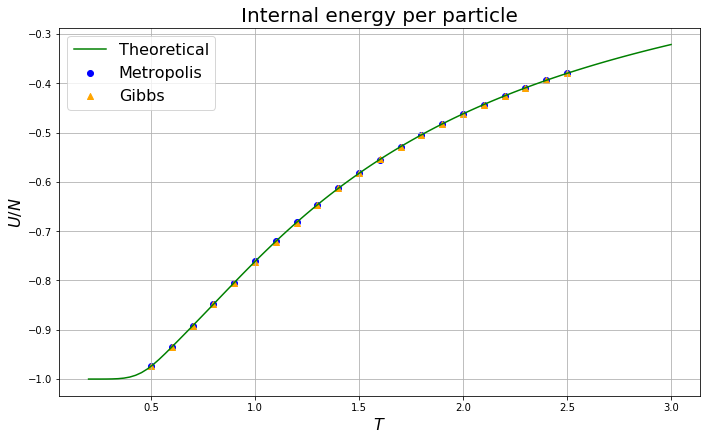

In [52]:
# energy

energy_true = -J*( th + ch*thN )/( 1 + thN )

energy_metr = []
error_metr = []
energy_gib = []
error_gib = []

read_observables("output_metro/output.ene.metro", 20, energy_metr, error_metr)
print("Energy (per particle) and errors as a function of temperature - M(RT)^2 sampling"  + "\n")
print_results(temp, energy_metr, error_metr)
print("\n")

read_observables("output_gibbs/output.ene.gibbs", 20, energy_gib, error_gib)
print("Energy (per particle) and errors as a function of temperature - Gibbs sampling" + "\n")
print_results(temp, energy_gib, error_gib)

plt.figure(figsize=FIG_SIZE, constrained_layout=True)
plt.plot(T, energy_true, color='green', label="Theoretical")
plt.scatter(temp, energy_metr, color='blue', marker = 'o', label='Metropolis')
plt.scatter(temp, energy_gib, color='orange', marker = '^', label='Gibbs')
plt.title("Internal energy per particle", fontsize=TITLE_SIZE)
plt.xlabel('$ T $', fontsize=LABEL_SIZE)
plt.ylabel('$ U/N $', fontsize=LABEL_SIZE)
plt.legend(fontsize=LABEL_SIZE)
plt.grid(True)

## Heat Capacity

Heat capacity (per particle) and errors as a function of temperature - M(RT)^2 sampling

0.5: 	 0.327033 +/- 0.00303309
0.6: 	 0.423701 +/- 0.00155229
0.7: 	 0.433998 +/- 0.00104364
0.8: 	 0.439556 +/- 0.00125226
0.9: 	 0.436375 +/- 0.000742565
1.0: 	 0.421103 +/- 0.000762304
1.1: 	 0.396653 +/- 0.000663895
1.2: 	 0.370848 +/- 0.000407993
1.3: 	 0.343785 +/- 0.000485334
1.4: 	 0.317484 +/- 0.000378785
1.5: 	 0.293571 +/- 0.000304946
1.6: 	 0.270769 +/- 0.000369008
1.7: 	 0.249079 +/- 0.000351762
1.8: 	 0.22935 +/- 0.000298202
1.9: 	 0.212725 +/- 0.000179664
2.0: 	 0.196783 +/- 0.000196365
2.1: 	 0.182369 +/- 0.000162417
2.2: 	 0.169413 +/- 0.000130857
2.3: 	 0.156964 +/- 0.00012821
2.4: 	 0.146599 +/- 0.000149933
2.5: 	 0.137185 +/- 0.000142169


Heat capacity (per particle) and errors as a function of temperature - Gibbs sampling

0.5: 	 0.330432 +/- 0.00443455
0.6: 	 0.421911 +/- 0.00221242
0.7: 	 0.430437 +/- 0.00195605
0.8: 	 0.439241 +/- 0.00142687
0.9: 	 0.435333 +/- 0.00100541
1

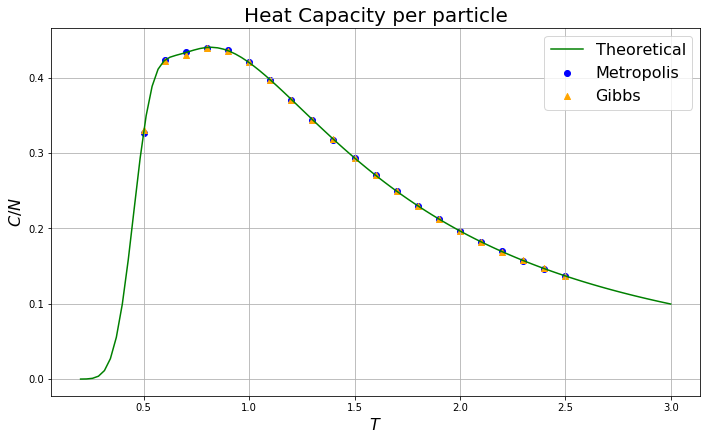

In [53]:
# heat capacity per particle

heat_true = ((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)

heat_metr = []
error_metr = []
heat_gib = []
error_gib = []

read_observables("output_metro/output.heat.metro", 20, heat_metr, error_metr)
print("Heat capacity (per particle) and errors as a function of temperature - M(RT)^2 sampling" + "\n")
print_results(temp, heat_metr, error_metr)
print("\n")

read_observables("output_gibbs/output.heat.gibbs", 20, heat_gib, error_gib)
print("Heat capacity (per particle) and errors as a function of temperature - Gibbs sampling" + "\n")
print_results(temp, heat_gib, error_gib)

plt.figure(figsize=FIG_SIZE, constrained_layout=True)
plt.plot(T, heat_true, color='green', label="Theoretical")
plt.scatter(temp, heat_metr, color='blue', marker = 'o', label='Metropolis')
plt.scatter(temp, heat_gib, color='orange', marker = '^', label='Gibbs')
plt.title("Heat Capacity per particle", fontsize=TITLE_SIZE)
plt.xlabel('$ T $', fontsize=LABEL_SIZE)
plt.ylabel('$ C/N $', fontsize=LABEL_SIZE)
plt.legend(fontsize=LABEL_SIZE)
plt.grid(True)

## Magnetization

Magnetization (per particle) and errors as a function of temperature - M(RT)^2 sampling

0.5: 	 0.889146 +/- 0.00532045
0.6: 	 0.665314 +/- 0.00469672
0.7: 	 0.441554 +/- 0.00481378
0.8: 	 0.294639 +/- 0.00301497
0.9: 	 0.198298 +/- 0.00175528
1.0: 	 0.145301 +/- 0.00161293
1.1: 	 0.112763 +/- 0.00118974
1.2: 	 0.0869504 +/- 0.000779621
1.3: 	 0.0716872 +/- 0.000972331
1.4: 	 0.0585581 +/- 0.000673294
1.5: 	 0.0509891 +/- 0.000612167
1.6: 	 0.0430535 +/- 0.00059156
1.7: 	 0.0378582 +/- 0.000498825
1.8: 	 0.0342168 +/- 0.000375461
1.9: 	 0.0301758 +/- 0.000354582
2.0: 	 0.0275605 +/- 0.000231393
2.1: 	 0.0244688 +/- 0.000335555
2.2: 	 0.0217755 +/- 0.000279259
2.3: 	 0.0207151 +/- 0.000261798
2.4: 	 0.0190606 +/- 0.000283578
2.5: 	 0.0176102 +/- 0.000266261


Magnetization (per particle) and errors as a function of temperature - Gibbs sampling

0.5: 	 0.885786 +/- 0.00640516
0.6: 	 0.67501 +/- 0.0088224
0.7: 	 0.43984 +/- 0.00612726
0.8: 	 0.293503 +/- 0.00420501
0.9: 	 0.200593 +/- 0.0

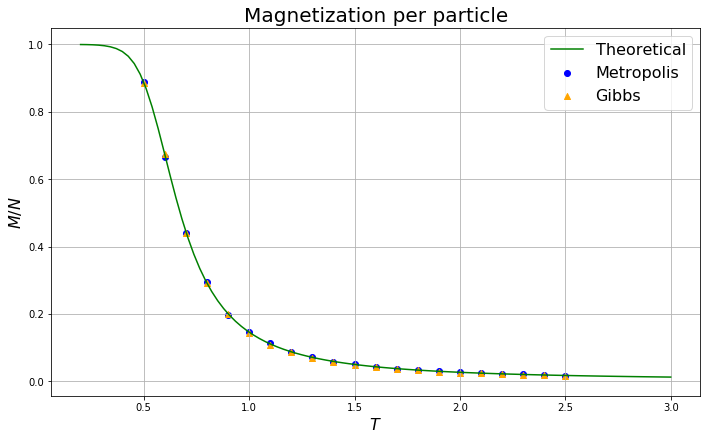

In [54]:
# external field on

h = 0.02
b = beta

# magnetization per particle

l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
mag_true = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)

mag_metr = []
error_metr = []
mag_gib = []
error_gib = []

read_observables("output_metro/output.mag.metro", 20, mag_metr, error_metr)
print("Magnetization (per particle) and errors as a function of temperature - M(RT)^2 sampling" + "\n")
print_results(temp, mag_metr, error_metr)
print("\n")

read_observables("output_gibbs/output.mag.gibbs", 20, mag_gib, error_gib)
print("Magnetization (per particle) and errors as a function of temperature - Gibbs sampling" + "\n")
print_results(temp, mag_gib, error_gib)

plt.figure(figsize=FIG_SIZE, constrained_layout=True)
plt.plot(T, mag_true, color='green', label="Theoretical")
plt.scatter(temp, mag_metr, color='blue', marker = 'o', label='Metropolis')
plt.scatter(temp, mag_gib, color='orange', marker = '^', label='Gibbs')
plt.title("Magnetization per particle", fontsize=TITLE_SIZE)
plt.xlabel('$ T $', fontsize=LABEL_SIZE)
plt.ylabel('$ M/N $', fontsize=LABEL_SIZE)
plt.legend(fontsize=LABEL_SIZE)
plt.grid(True)

## Susceptibility

Susceptibility (per particle) and errors as a function of temperature - M(RT)^2 sampling

0.5: 	 79.2039 +/- 0.353216
0.6: 	 44.1267 +/- 0.219311
0.7: 	 24.9502 +/- 0.129553
0.8: 	 15.2495 +/- 0.0934995
0.9: 	 10.3386 +/- 0.0343297
1.0: 	 7.39823 +/- 0.0298127
1.1: 	 5.63305 +/- 0.0158304
1.2: 	 4.41301 +/- 0.0140365
1.3: 	 3.57407 +/- 0.00923603
1.4: 	 2.97369 +/- 0.00697871
1.5: 	 2.52834 +/- 0.00537068
1.6: 	 2.18723 +/- 0.00408001
1.7: 	 1.91067 +/- 0.00363389
1.8: 	 1.68545 +/- 0.00267806
1.9: 	 1.50913 +/- 0.00214618
2.0: 	 1.35938 +/- 0.00177543
2.1: 	 1.2308 +/- 0.00158565
2.2: 	 1.1273 +/- 0.00138226
2.3: 	 1.03797 +/- 0.00137758
2.4: 	 0.957973 +/- 0.00106821
2.5: 	 0.889728 +/- 0.00125035


Susceptibility (per particle) and errors as a function of temperature - Gibbs sampling

0.5: 	 78.9921 +/- 0.589418
0.6: 	 44.4583 +/- 0.301385
0.7: 	 24.5694 +/- 0.144771
0.8: 	 15.1642 +/- 0.0796981
0.9: 	 10.2086 +/- 0.0552833
1.0: 	 7.37828 +/- 0.0254099
1.1: 	 5.59282 +/- 0.0193984
1

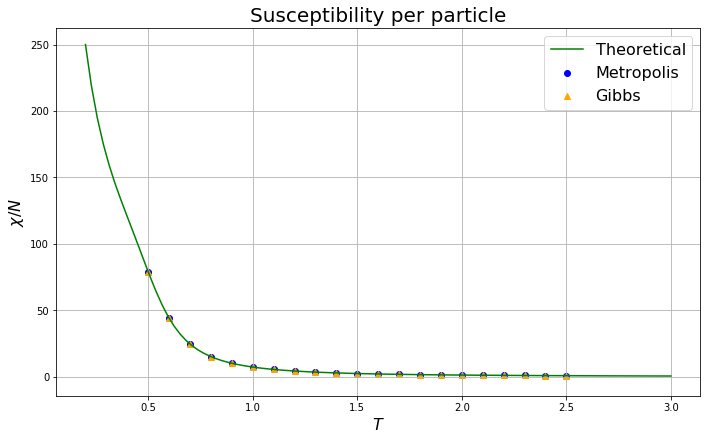

In [55]:
# Susceptibility

X_true = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)

X_metr = []
error_metr = []
X_gib = []
error_gib = []

read_observables("output_metro/output.chi.metro", 20, X_metr, error_metr)
print("Susceptibility (per particle) and errors as a function of temperature - M(RT)^2 sampling" + "\n")
print_results(temp, X_metr, error_metr)
print("\n")

read_observables("output_gibbs/output.chi.gibbs", 20, X_gib, error_gib)
print("Susceptibility (per particle) and errors as a function of temperature - Gibbs sampling" + "\n")
print_results(temp, X_gib, error_gib)

plt.figure(figsize=FIG_SIZE, constrained_layout=True)
plt.plot(T, X_true, color='green', label="Theoretical")
plt.scatter(temp, X_metr, color='blue', marker = 'o', label='Metropolis')
plt.scatter(temp, X_gib, color='orange', marker = '^', label='Gibbs')
plt.title("Susceptibility per particle", fontsize=TITLE_SIZE)
plt.xlabel('$ T $', fontsize=LABEL_SIZE)
plt.ylabel('$ \chi /N $', fontsize=LABEL_SIZE)
plt.legend(fontsize=LABEL_SIZE)
plt.grid(True)